In [21]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import cv2 as cv
from sklearn.cluster import KMeans

# Reading and Reshaping an image

In [28]:
img = cv.imread('elephant.jpg')
cv.imshow('Elephant',img)
cv.waitKey(0)

-1

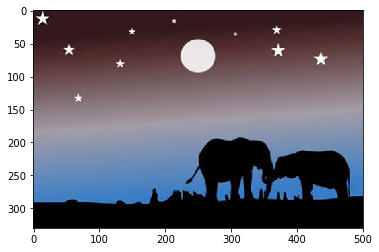

In [27]:
cv.cvtColor(img,cv.COLOR_BGR2RGB)
plt.imshow(img)

In [3]:
old_shape = img.shape
###storing image in linear array
img = img.reshape((-1,3))


In [11]:
### Apply K-means clustering and describing number of segments required
k_means = KMeans(n_clusters=3)
k_means.fit(img)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [12]:
###Storing center of all cluster
centers = k_means.cluster_centers_
centers = np.array(centers,dtype='uint8')

<Figure size 1440x720 with 0 Axes>

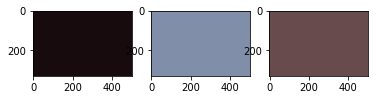

In [13]:
### Plotting the color that each cluster centers would represent
plt.figure(figsize=(20,10))
fig,axs = plt.subplots(1,len(centers))

color = []
for i in range(len(centers)):
    a1 = np.zeros(old_shape,dtype='uint8')
    color.append(centers[i])
    a1[:,:,:]=centers[i]
    axs[i].imshow(a1)
plt.show()

In [14]:
### storing in label the cluster to which each point belong
label = k_means.labels_

In [15]:
### Creating final image and assigining to clear to each point based on their label value
fin_img = np.zeros(img.shape,dtype='uint8')
for i in range(img.shape[0]):
    fin_img[i] = color[label[i]]
    

In [16]:
### reshaping final image into its original shape
fin_img = fin_img.reshape(old_shape)

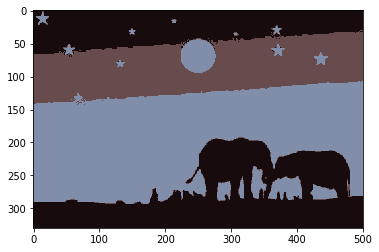

In [17]:
plt.imshow(fin_img)

In [29]:
cv.imshow('segmented',fin_img)
cv.waitKey(0)

-1